In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import pickle
from sklearn.tree import DecisionTreeRegressor

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Set maximum number of columns to be displayed
pd.set_option('display.max_columns', 100)

In [2]:
data =pd.read_csv('..\ANZ_transaction dataset.csv')
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,01/08/2018,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,01/08/2018,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,01/08/2018,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,01/08/2018,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,01/08/2018,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
data.drop(columns =['bpay_biller_code', 'currency', 'merchant_code', 'merchant_suburb', 'merchant_state', 'merchant_long_lat', 'country'], inplace=True) 

In [4]:
data.columns

Index(['status', 'card_present_flag', 'account', 'long_lat', 'txn_description',
       'merchant_id', 'first_name', 'balance', 'date', 'gender', 'age',
       'extraction', 'amount', 'transaction_id', 'customer_id', 'movement'],
      dtype='object')

## Annual_salary

In [40]:
salary_data = pd.DataFrame(data.loc[data.txn_description == 'PAY/SALARY'].groupby(['customer_id', 'age', 'gender'])['amount'].sum())
salary_data.reset_index(level=['customer_id', 'age', 'gender'], inplace=True)
salary_data.rename(columns={'amount': 'salary_annual'}, inplace=True)

salary_data['salary_annual'] = salary_data['salary_annual']*4
salary_data

,customer_id,age,gender,salary_annual
0,CUS-1005756958,53,F,50464.44
1,CUS-1117979751,21,M,100202.20
2,CUS-1140341822,28,M,45996.24
3,CUS-1147642491,34,F,88992.28
4,CUS-1196156254,34,F,109304.44
...,...,...,...,...
95,CUS-72755508,35,F,34815.36
96,CUS-809013380,21,F,53927.64
97,CUS-860700529,30,M,43406.88
98,CUS-880898248,26,M,34415.52


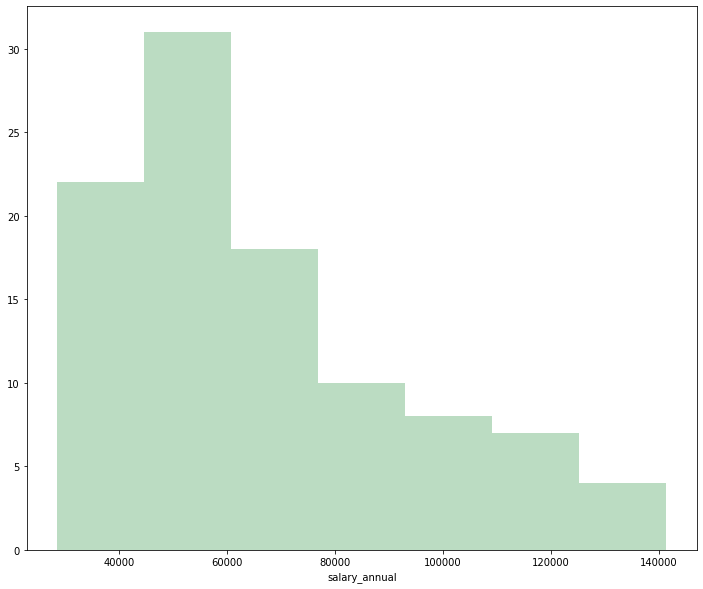

In [52]:
# Histogram 
plt.figure(figsize=(12, 10))
sns.set_color_codes()
sns.distplot(a=salary_data['salary_annual'], kde=False, color='g')

## correlation between salary and other features

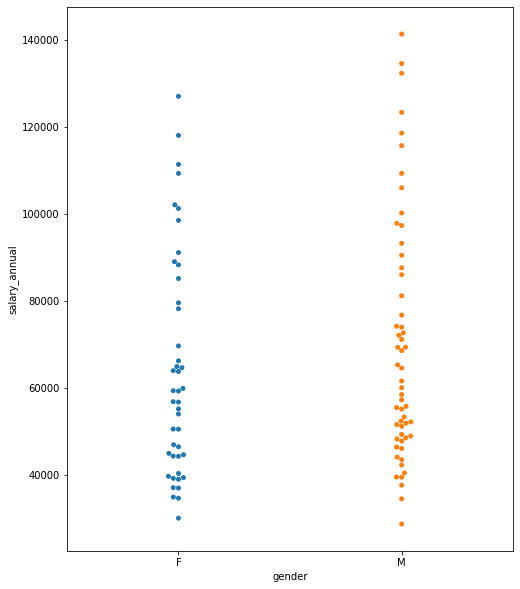

In [59]:
plt.figure(figsize=(8, 10))
sns.swarmplot(x=salary_data['gender'],
              y=salary_data['salary_annual'])

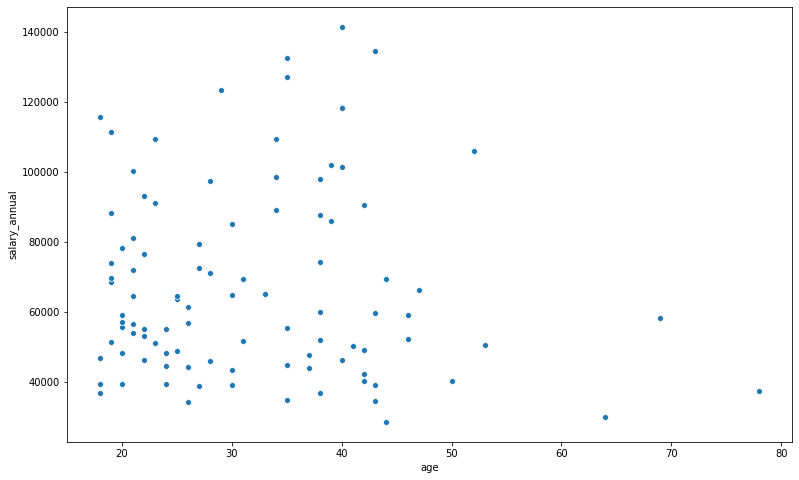

In [64]:
plt.figure(figsize=(13, 8))
sns.scatterplot(x=salary_data['age'], y=salary_data['salary_annual'])

## POS Transaction

In [65]:
data.loc[data.txn_description == 'POS']

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,extraction,amount,transaction_id,customer_id,movement
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,01/08/2018,F,26,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,debit
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,01/08/2018,M,38,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,debit
7,authorized,1.0,ACC-2776252858,144.95 -37.76,POS,ee58145d-26e8-4b01-9cd9-62378014f21d,Kristin,1232.75,01/08/2018,F,43,2018-08-01T04:11:25.000+0000,15.61,e1c4a50d6a0549cbb3710a62a2fa00d5,CUS-4123612273,debit
8,authorized,1.0,ACC-182446574,116.06 -32.00,POS,cfbf535e-caa8-499f-9d41-bbdc2b836d85,Tonya,213.16,01/08/2018,F,27,2018-08-01T04:40:00.000+0000,19.25,799e39eb2c1b411185424b0f2cd18bda,CUS-3026014945,debit
15,authorized,1.0,ACC-1903037542,153.05 -27.61,POS,d920de7f-959c-4d9a-aee5-930689a2f8cd,Jeffrey,2.85,01/08/2018,M,30,2018-08-01T07:20:48.000+0000,10.79,28347ba260d84f8d81ab70d9e901ea8e,CUS-860700529,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12018,authorized,1.0,ACC-3100725361,145.73 -17.03,POS,3d5cd451-fdd7-4eae-9494-d9866e8cdedf,Ronald,10471.98,31/10/2018,M,25,2018-10-31T19:44:28.000+0000,34.31,c43b9e087328441ea2ddac6056ce5e96,CUS-2178051368,debit
12019,authorized,1.0,ACC-53508546,150.62 -33.76,POS,e42055f4-e6a9-4915-9936-035981fd3de2,Kimberly,7036.56,31/10/2018,F,35,2018-10-31T19:57:37.000+0000,70.58,7830702140b44d03af6d33ee79a9c6f1,CUS-72755508,debit
12034,authorized,1.0,ACC-1516130869,130.84 -12.45,POS,7a3610ce-2f3c-4c7f-becf-987ddeb1c533,Jessica,4946.62,31/10/2018,F,21,2018-10-31T22:51:45.000+0000,23.48,74b737841b9548b494af32ba71627716,CUS-325142416,debit
12038,authorized,0.0,ACC-3021093232,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,Melissa,14054.14,31/10/2018,F,30,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,CUS-55310383,debit


In [66]:
pos_data = pd.DataFrame(data.loc[data.txn_description == 'POS'].groupby(['customer_id'])['amount'].sum())
pos_data.rename(columns={'amount': 'pos_annual'}, inplace=True)
pos_data.reset_index(level = ['customer_id'] ,inplace=True)

#balance = pd.DataFrame(data.loc[data.txn_description == 'POS'].groupby(['customer_id'])['balance'].sum()).reset_index()

# a = pd.DataFrame(data.customer_id.loc[data.txn_description =='POS'].value_counts()).reset_index()
# a.rename(columns={'index': 'customer_id', 'customer_id': 'appear'}, inplace=True)

# pos_data = pos_data.merge(a, how='inner', on='customer_id')
#pos_data = pos_data.merge(balance, how='inner', on='customer_id')
# pos_data['appear'] = pos_data['appear']*4 

#pos_data['pos_annual'] = pos_data['pos_annual'] + pos_data['balance'] 
#pos_data.drop(columns=['balance'], inplace=True)
pos_data

,customer_id,pos_annual
0,CUS-1005756958,748.01
1,CUS-1117979751,606.37
2,CUS-1140341822,1356.47
3,CUS-1147642491,2062.31
4,CUS-1196156254,2305.65
...,...,...
95,CUS-72755508,350.31
96,CUS-809013380,1135.01
97,CUS-860700529,2731.99
98,CUS-880898248,422.13


## SALES-POS Trasnsaction

In [67]:
data.loc[data.txn_description == 'SALES-POS']

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,extraction,amount,transaction_id,customer_id,movement
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,01/08/2018,F,26,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,debit
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,01/08/2018,F,40,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,debit
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,01/08/2018,F,26,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,debit
6,authorized,1.0,ACC-2776252858,144.95 -37.76,SALES-POS,3aa18033-a0a9-4190-a117-b7caaf4d07e3,Kristin,1248.36,01/08/2018,F,43,2018-08-01T02:23:04.000+0000,61.06,b79ca208099c4c28aa5dae966096d842,CUS-4123612273,debit
12,authorized,1.0,ACC-182446574,116.06 -32.00,SALES-POS,33952b07-859c-4c0a-8b1d-813a5f6b444c,Tonya,207.08,01/08/2018,F,27,2018-08-01T06:06:40.000+0000,6.08,9ba4928260b24fbb8fb00f1f8d86b868,CUS-3026014945,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12031,authorized,0.0,ACC-1443681913,150.92 -33.77,SALES-POS,6fcdc956-3548-40b2-a2ce-9dbc6cb64eb9,Ryan,5540.27,31/10/2018,M,31,2018-10-31T21:56:11.000+0000,70.51,f82ed841f0404363b4a3782ce6118294,CUS-3129499595,debit
12033,authorized,1.0,ACC-3100725361,145.73 -17.03,SALES-POS,f17a5cbd-fa5d-47db-8235-c7f449597dd0,Ronald,10445.39,31/10/2018,M,25,2018-10-31T22:22:21.000+0000,26.59,593930fd0e1640398b5638f74b7dee14,CUS-2178051368,debit
12039,authorized,1.0,ACC-1608363396,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,Robert,9137.79,31/10/2018,M,20,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,CUS-2688605418,debit
12041,authorized,1.0,ACC-2920611728,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,Tyler,11350.67,31/10/2018,M,69,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,CUS-1388323263,debit


In [68]:
spos_data = pd.DataFrame(data.loc[data.txn_description == 'SALES-POS'].groupby(['customer_id'])['amount'].sum())
spos_data.rename(columns={'amount': 'spos_annual'}, inplace=True)
spos_data.reset_index(level = ['customer_id'] ,inplace=True)

# balance = pd.DataFrame(data.loc[data.txn_description == 'SALES-POS'].groupby(['customer_id'])['balance'].sum()).reset_index()

# a = pd.DataFrame(data.customer_id.loc[data.txn_description =='SALES-POS'].value_counts()).reset_index()
# a.rename(columns={'index': 'customer_id', 'customer_id': 'appear'}, inplace=True)

# spos_data = spos_data.merge(a, how='inner', on='customer_id')
# spos_data = spos_data.merge(balance, how='inner', on='customer_id')
# spos_data['appear'] = spos_data['appear']*4

# spos_data['spos_annual'] =spos_data['spos_annual']*spos_data['appear'] #(spos_data['balance']*4) - 
# spos_data.drop(columns=['appear', 'balance'], inplace=True)
spos_data

,customer_id,spos_annual
0,CUS-1005756958,1062.85
1,CUS-1117979751,3369.45
2,CUS-1140341822,3033.07
3,CUS-1147642491,1823.44
4,CUS-1196156254,2634.96
...,...,...
94,CUS-72755508,1204.22
95,CUS-809013380,1267.17
96,CUS-860700529,3251.17
97,CUS-880898248,1196.44


## INTER BANK Transaction

In [69]:
data.loc[data.txn_description == 'INTER BANK']

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,extraction,amount,transaction_id,customer_id,movement
9,posted,NaN,ACC-602667573,151.23 -33.96,INTER BANK,NaN,Michael,466.58,01/08/2018,M,40,2018-08-01T06:00:00.000+0000,21.0,798a77869014441b840a7a8a23408332,CUS-2031327464,debit
13,posted,NaN,ACC-588564840,151.27 -33.76,INTER BANK,NaN,Isaiah,4438.16,01/08/2018,M,23,2018-08-01T07:00:00.000+0000,25.0,eaafa602902b4f4194efb96a105dd7ab,CUS-1462656821,debit
14,posted,NaN,ACC-1496451953,145.16 -37.84,INTER BANK,NaN,Ricky,173.66,01/08/2018,M,43,2018-08-01T07:00:00.000+0000,39.0,243dcea5fb1846ffb89671edf45f157d,CUS-3142625864,debit
16,posted,NaN,ACC-2014856841,144.99 -37.90,INTER BANK,NaN,Patrick,260514.83,01/08/2018,M,46,2018-08-01T08:00:00.000+0000,22.0,ae8124d2e33547bdb605d9a51581457f,CUS-2370108457,debit
25,posted,NaN,ACC-354106658,151.04 -33.80,INTER BANK,NaN,Christine,4474.38,01/08/2018,F,39,2018-08-01T09:00:00.000+0000,25.0,f8cbe52460864f5fa77728f4a9e08997,CUS-2376382098,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11938,posted,NaN,ACC-1799207998,150.68 -33.79,INTER BANK,NaN,Susan,10094.03,31/10/2018,F,20,2018-10-31T10:00:00.000+0000,39.0,e979fe6f77404adfb0d71abe4819bddb,CUS-164374203,debit
11963,posted,NaN,ACC-182446574,116.06 -32.00,INTER BANK,NaN,Tonya,10953.17,31/10/2018,F,27,2018-10-31T12:00:00.000+0000,57.0,9581e449fc0e42eba678b84e6818d4c8,CUS-3026014945,debit
11969,posted,NaN,ACC-3100725361,145.73 -17.03,INTER BANK,NaN,Ronald,10530.89,31/10/2018,M,25,2018-10-31T13:00:00.000+0000,26.0,dd8314056cce459596226942ac33bf79,CUS-2178051368,debit
12022,posted,NaN,ACC-182446574,116.06 -32.00,INTER BANK,NaN,Tonya,10920.17,31/10/2018,F,27,2018-10-31T20:00:00.000+0000,33.0,2ecd88fa9fd34a33937ac860e320df7a,CUS-3026014945,debit


In [70]:
ib_data = pd.DataFrame(data.loc[data.txn_description == 'INTER BANK'].groupby(['customer_id'])['amount'].sum())
ib_data.rename(columns={'amount': 'ib_annual'}, inplace=True)
ib_data.reset_index(level = ['customer_id'] ,inplace=True)

# balance = pd.DataFrame(data.loc[data.txn_description == 'INTER BANK'].groupby(['customer_id'])['balance'].sum()).reset_index()

# a = pd.DataFrame(data.customer_id.loc[data.txn_description =='INTER BANK'].value_counts()).reset_index()
# a.rename(columns={'index': 'customer_id', 'customer_id': 'appear'}, inplace=True)

# ib_data = ib_data.merge(a, how='inner', on='customer_id')
# ib_data = ib_data.merge(balance, how='inner', on='customer_id')
# ib_data['appear'] = ib_data['appear']*4

# ib_data['ib_annual'] =ib_data['ib_annual']*ib_data['appear']#(ib_data['balance']*4) -  
# ib_data.drop(columns=['appear', 'balance'], inplace=True)
ib_data

,customer_id,ib_annual
0,CUS-1117979751,1001.0
1,CUS-1140341822,270.0
2,CUS-1147642491,250.0
3,CUS-1196156254,767.0
4,CUS-1271030853,1219.0
...,...,...
63,CUS-51506836,3794.0
64,CUS-527400765,917.0
65,CUS-55310383,465.0
66,CUS-809013380,1383.0


## PHONE BANK Transaction

In [71]:
data.loc[data.txn_description == 'PHONE BANK']

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,extraction,amount,transaction_id,customer_id,movement
123,posted,NaN,ACC-4281711154,144.98 -37.84,PHONE BANK,NaN,Eric,35322.36,01/08/2018,M,42,2018-08-01T20:00:00.000+0000,36.0,c8658e7c726f45ca8b3c3c78d1554700,CUS-3151318058,debit
200,posted,NaN,ACC-3879258709,143.83 -37.66,PHONE BANK,NaN,Natasha,186195.30,02/08/2018,F,40,2018-08-02T12:00:00.000+0000,41.0,531d40e876f04bad8882716ae4744fa4,CUS-527400765,debit
270,posted,NaN,ACC-854938045,147.63 -22.84,PHONE BANK,NaN,James,6866.65,02/08/2018,M,28,2018-08-02T21:00:00.000+0000,58.0,32fb30d6f06645f1b200c2f73bf8203c,CUS-4023861240,debit
570,posted,NaN,ACC-2231965366,144.96 -37.84,PHONE BANK,NaN,Linda,1322.05,05/08/2018,F,35,2018-08-05T03:00:00.000+0000,82.0,7dd26985d4ca4490a69666700c185b10,CUS-2155701614,debit
767,posted,NaN,ACC-1903037542,153.05 -27.61,PHONE BANK,NaN,Jeffrey,1205.42,07/08/2018,M,30,2018-08-07T02:00:00.000+0000,134.0,e009b67935cd4ee9968f27b7c0d7f815,CUS-860700529,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11257,posted,NaN,ACC-854938045,147.63 -22.84,PHONE BANK,NaN,James,13644.68,25/10/2018,M,28,2018-10-25T21:00:00.000+0000,58.0,3d6a8775cc974b5d9a12c9b5d316e2ff,CUS-4023861240,debit
11506,posted,NaN,ACC-37709441,153.41 -28.01,PHONE BANK,NaN,Charles,19980.76,27/10/2018,M,18,2018-10-27T16:00:00.000+0000,21.0,ad5c53695ba44db1bd93e8a0294be0bb,CUS-3336454548,debit
11816,posted,NaN,ACC-240804743,121.48 -30.75,PHONE BANK,NaN,Kenneth,24886.99,30/10/2018,M,29,2018-10-30T03:00:00.000+0000,43.0,db9abbbe8d214174b79ff65ca421b0da,CUS-261674136,debit
12023,posted,NaN,ACC-4281711154,144.98 -37.84,PHONE BANK,NaN,Eric,43543.84,31/10/2018,M,42,2018-10-31T20:00:00.000+0000,36.0,4f784598b47b4c0e8856e28bd4363bcc,CUS-3151318058,debit


In [72]:
pb_data = pd.DataFrame(data.loc[data.txn_description == 'PHONE BANK'].groupby(['customer_id'])['amount'].sum())
pb_data.rename(columns={'amount': 'pb_annual'}, inplace=True)
pb_data.reset_index(level = ['customer_id'] ,inplace=True)

# balance = pd.DataFrame(data.loc[data.txn_description == 'PHONE BANK'].groupby(['customer_id'])['balance'].sum()).reset_index()

# a = pd.DataFrame(data.customer_id.loc[data.txn_description =='PHONE BANK'].value_counts()).reset_index()
# a.rename(columns={'index': 'customer_id', 'customer_id': 'appear'}, inplace=True)

# pb_data = pb_data.merge(a, how='inner', on='customer_id')
# pb_data = pb_data.merge(balance, how='inner', on='customer_id')
# pb_data['appear'] = pb_data['appear']*4

# pb_data['pb_annual'] = pb_data['pb_annual']*pb_data['appear']#(pb_data['balance']*4) -  
# pb_data.drop(columns=['appear', 'balance'], inplace=True)
pb_data

,customer_id,pb_annual
0,CUS-1005756958,546.0
1,CUS-1646183815,450.0
2,CUS-1896554896,1916.0
3,CUS-2155701614,246.0
4,CUS-2348881191,1629.0
5,CUS-2376382098,531.0
6,CUS-261674136,559.0
7,CUS-3151318058,504.0
8,CUS-3180318393,871.0
9,CUS-326006476,474.0


## PAYMENT Transaction

In [73]:
data.loc[data.txn_description == 'PAYMENT']

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,extraction,amount,transaction_id,customer_id,movement
5,posted,NaN,ACC-1608363396,151.22 -33.87,PAYMENT,NaN,Robert,1705.43,01/08/2018,M,20,2018-08-01T02:00:00.000+0000,163.0,1005b48a6eda4ffd85e9b649dc9467d3,CUS-2688605418,debit
10,posted,NaN,ACC-2171593283,146.94 -36.04,PAYMENT,NaN,Fernando,4348.50,01/08/2018,M,19,2018-08-01T06:00:00.000+0000,27.0,baff17b27b2643c48c84fca7129e9611,CUS-2317998716,debit
11,posted,NaN,ACC-2776252858,144.95 -37.76,PAYMENT,NaN,Kristin,1203.75,01/08/2018,F,43,2018-08-01T06:00:00.000+0000,29.0,78a1b6c3a5534d48828d8ed266ba9c2e,CUS-4123612273,debit
17,posted,NaN,ACC-4163822186,149.03 -34.97,PAYMENT,NaN,Karen,3117.94,01/08/2018,F,26,2018-08-01T08:00:00.000+0000,55.0,0b0bc166b6da49b1ac64d3bb9c4ef550,CUS-2630892467,debit
18,posted,NaN,ACC-3954677887,115.72 -32.28,PAYMENT,NaN,Ruth,38.31,01/08/2018,F,47,2018-08-01T08:00:00.000+0000,58.0,c24ca89f7aba4ab4b8d3e9ac0c5f4fab,CUS-3716701010,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12021,posted,NaN,ACC-1650504218,145.01 -37.93,PAYMENT,NaN,Marissa,19547.32,31/10/2018,F,23,2018-10-31T20:00:00.000+0000,33.0,96e0fa11725543af9b0af61f3244081b,CUS-2500783281,debit
12032,posted,NaN,ACC-1710017148,150.82 -34.01,PAYMENT,NaN,Michelle,20699.90,31/10/2018,F,19,2018-10-31T22:00:00.000+0000,33.0,96fe9c5dcda24b599e81b6f6d5bdcb66,CUS-883482547,debit
12035,posted,NaN,ACC-1973887809,115.78 -31.90,PAYMENT,NaN,Antonio,9349.51,31/10/2018,M,26,2018-10-31T23:00:00.000+0000,29.0,dda53e538c5b4d5aae2481be22e60440,CUS-1646621553,debit
12036,posted,NaN,ACC-1349834573,145.17 -37.84,PAYMENT,NaN,Matthew,18127.50,31/10/2018,M,39,2018-10-31T23:00:00.000+0000,32.0,df15d6f039554dcbb3ca02631ce22068,CUS-1790886359,debit


In [74]:
py_data = pd.DataFrame(data.loc[data.txn_description == 'PAYMENT'].groupby(['customer_id'])['amount'].sum())
py_data.rename(columns={'amount': 'py_annual'}, inplace=True)
py_data.reset_index(level = ['customer_id'] ,inplace=True)

# balance = pd.DataFrame(data.loc[data.txn_description == 'PAYMENT'].groupby(['customer_id'])['balance'].sum()).reset_index()

# a = pd.DataFrame(data.customer_id.loc[data.txn_description =='PAYMENT'].value_counts()).reset_index()
# a.rename(columns={'index': 'customer_id', 'customer_id': 'appear'}, inplace=True)

# py_data = py_data.merge(a, how='inner', on='customer_id')
# py_data = py_data.merge(balance, how='inner', on='customer_id')
# py_data['appear'] = py_data['appear']*4

# py_data['py_annual'] =py_data['py_annual']*py_data['appear'] #(py_data['balance']*4) - 
# py_data.drop(columns=['appear', 'balance'], inplace=True)
py_data

,customer_id,py_annual
0,CUS-1005756958,1296.0
1,CUS-1117979751,3957.0
2,CUS-1140341822,852.0
3,CUS-1147642491,2597.0
4,CUS-1196156254,3017.0
...,...,...
95,CUS-72755508,1180.0
96,CUS-809013380,1543.0
97,CUS-860700529,629.0
98,CUS-880898248,1240.0


## Combination 

In [75]:
sal_data = salary_data.merge(ib_data , how='left', on='customer_id')
sal_data = sal_data.merge(pos_data , how='left', on='customer_id')
sal_data = sal_data.merge(pb_data , how='left', on='customer_id')
sal_data = sal_data.merge(spos_data , how='left', on='customer_id')
sal_data = sal_data.merge(py_data , how='left', on='customer_id')
sal_data.fillna(0, inplace=True)

# sal_data['ib_annual'] = 2* sal_data['ib_annual']
# sal_data['pos_annual'] = 2* sal_data['pos_annual']
# sal_data['pb_annual'] = 2* sal_data['pb_annual']
# sal_data['spos_annual'] = 2* sal_data['spos_annual']
# sal_data['py_annual'] = 2* sal_data['py_annual']


sal_data['cal'] = sal_data['ib_annual'] + sal_data['pos_annual'] + sal_data['pb_annual'] + sal_data['spos_annual'] + sal_data['py_annual']
sal_data.drop(columns =['ib_annual','pos_annual', 'pb_annual', 'spos_annual', 'py_annual'], inplace=True)
sal_data.head(10)

,customer_id,age,gender,salary_annual,cal
0,CUS-1005756958,53,F,50464.44,3652.86
1,CUS-1117979751,21,M,100202.20,8933.82
2,CUS-1140341822,28,M,45996.24,5511.54
3,CUS-1147642491,34,F,88992.28,6732.75
4,CUS-1196156254,34,F,109304.44,8724.61
5,CUS-1220154422,25,F,63906.08,4619.59
6,CUS-1233833708,44,M,28623.84,3229.58
7,CUS-1271030853,30,F,64856.40,12865.68
8,CUS-127297539,20,F,59217.08,7052.54
9,CUS-134193016,21,F,56663.04,3065.05


## Correlation

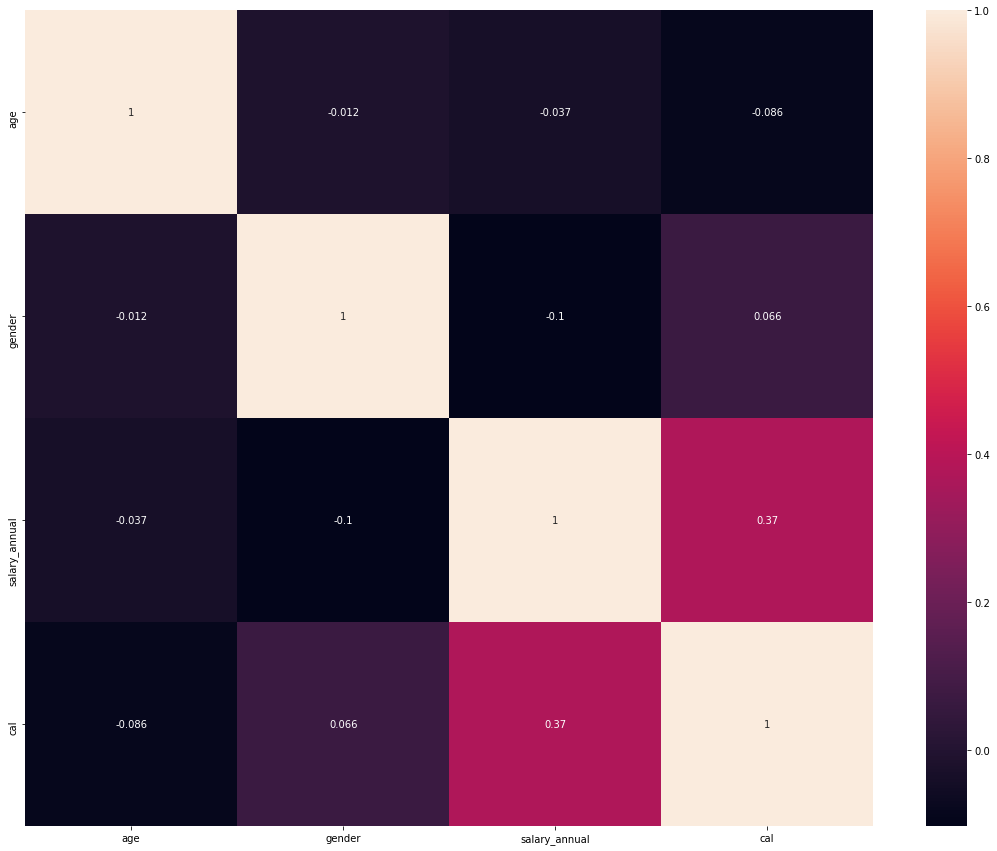

In [78]:
#correlation
correlation = sal_data.corr()

# Plot correlation
plt.figure(figsize=(19,15))
sns.heatmap(correlation, xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Data conversoin

In [37]:
sal_data.dtypes

customer_id       object
gender            object
age                int64
salary_annual    float64
cal              float64
dtype: object

In [77]:
sal_data.gender.replace('F', 2, inplace=True)
sal_data.gender.replace('M', 1, inplace=True)
sal_data

,customer_id,age,gender,salary_annual,cal
0,CUS-1005756958,53,2,50464.44,3652.86
1,CUS-1117979751,21,1,100202.20,8933.82
2,CUS-1140341822,28,1,45996.24,5511.54
3,CUS-1147642491,34,2,88992.28,6732.75
4,CUS-1196156254,34,2,109304.44,8724.61
...,...,...,...,...,...
95,CUS-72755508,35,2,34815.36,2734.53
96,CUS-809013380,21,2,53927.64,5328.18
97,CUS-860700529,30,1,43406.88,7248.16
98,CUS-880898248,26,1,34415.52,2858.57


## Splitting

In [79]:
X=sal_data.drop(columns=['salary_annual', 'customer_id'])
y=sal_data['salary_annual']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

## Random_Forest_Regressor

In [127]:
regressor = RandomForestRegressor(n_estimators=90, min_samples_split=5, max_depth=10, criterion='mae')
regressor.fit(X_train, y_train)
y_rfr = regressor.predict(X_test)

df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_rfr})
df

,Real Values,Predicted Values
95,8703.84,10790.402889
1,25050.55,19704.547611
94,11713.74,17348.130556
42,12609.06,24422.563944
0,12616.11,12025.620111


### RandomizedSearch

In [120]:
r=RandomForestRegressor()
param_grid = {'n_estimators': [x for x in np.arange(10, 500, 10)],
             'criterion': ['mse', 'mae'],
             'max_depth': [x for x in np.arange(2, 50, 2)],
             'min_samples_split': [x for x in np.arange(1, 10, 1)]
                                                    }

#use gridsearch to test all values for n_neighbors
RFC_gscv = RandomizedSearchCV(reg, param_distributions=param_grid,
                               n_iter=1, n_jobs=4, cv=5, verbose=3)
#fit model to data
RFC_gscv.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    4.3s remaining:    6.5s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    4.5s finished


RandomizedSearchCV(cv=5,
                   estimator=GradientBoostingRegressor(learning_rate=1.01,
                                                       min_samples_split=34,
                                                       n_estimators=60),
                   n_iter=1, n_jobs=4,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [2, 4, 6, 8, 10, 12, 14,
                                                      16, 18, 20, 22, 24, 26,
                                                      28, 30, 32, 34, 36, 38,
                                                      40, 42, 44, 46, 48],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                     

In [121]:
RFC_gscv.best_params_

{'n_estimators': 90,
 'min_samples_split': 5,
 'max_depth': 10,
 'criterion': 'mae'}

## Gradient_Bosting_Regression

In [118]:
reg = GradientBoostingRegressor(n_estimators=60, min_samples_split=34, learning_rate=1.01)
reg.fit(X_train, y_train)
y_rgb = reg.predict(X_test)

df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_rgb})
df

,Real Values,Predicted Values
95,8703.84,15685.236920
1,25050.55,24874.707749
94,11713.74,10743.920573
42,12609.06,37958.066033
0,12616.11,15476.919599


In [111]:
r=GradientBoostingRegressor()
param_grid = {'n_estimators': [50 ,100, 200, 300, 400, 500, 600, 800, 1000],
             'learning_rate': [x for x in np.arange(0.01, 10, 0.1)],
             'min_samples_split': [x for x in np.arange(2, 50, 2)]}

#use gridsearch to test all values for n_neighbors
RFC_gscv = RandomizedSearchCV(reg, param_distributions=param_grid,
                               n_iter=1, n_jobs=4, cv=5, verbose=3)
#fit model to data
RFC_gscv.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.6s finished


RandomizedSearchCV(cv=5,
                   estimator=GradientBoostingRegressor(learning_rate=0.5,
                                                       min_samples_split=17,
                                                       n_estimators=400),
                   n_iter=1, n_jobs=4,
                   param_distributions={'learning_rate': [0.01, 0.11,
                                                          0.21000000000000002,
                                                          0.31000000000000005,
                                                          0.41000000000000003,
                                                          0.51,
                                                          0.6100000000000001,
                                                          0.7100000000000001,
                                                          0.81, 0.91, 1.01,
                                                          1.11,
                                            

In [112]:
RFC_gscv.best_params_

{'n_estimators': 800, 'min_samples_split': 44, 'learning_rate': 1.01}

## SVR 

In [104]:
SV = SVR(kernel='sigmoid', gamma='auto', C=3.92)
SV.fit(X_train, y_train)
y_svr = SV.predict(X_test)

df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_svr})
df

,Real Values,Predicted Values
95,8703.84,14952.56
1,25050.55,14952.56
94,11713.74,14952.56
42,12609.06,14952.56
0,12616.11,14952.56


### RandomizedSearch

In [90]:
r = SVR()
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma': ['scale', 'auto'],
              'C': [x for x in np.arange(0.01,10, 0.01)]}

#use gridsearch to test all values for n_neighbors
RFC_gscv = RandomizedSearchCV(r, param_distributions=param_grid,
                               n_iter=1, n_jobs=4, cv=5, verbose=3)
#fit model to data
RFC_gscv.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.1s finished


RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=1, n_jobs=4,
                   param_distributions={'C': [0.01, 0.02, 0.03, 0.04, 0.05,
                                              0.060000000000000005,
                                              0.06999999999999999, 0.08, 0.09,
                                              0.09999999999999999, 0.11, 0.12,
                                              0.13, 0.14, 0.15000000000000002,
                                              0.16, 0.17, 0.18000000000000002,
                                              0.19, 0.2, 0.21000000000000002,
                                              0.22, 0.23, 0.24000000000000002,
                                              0.25, 0.26, 0.27, 0.28,
                                              0.29000000000000004, 0.3, ...],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                             

In [91]:
RFC_gscv.best_params_

{'kernel': 'sigmoid', 'gamma': 'auto', 'C': 3.92}

## Decesion Tree

In [86]:
# Fit regression model
regr_1 = DecisionTreeRegressor()#min_samples_split=29, max_depth=1, criterion='friedman_mse')#max_depth=10)
regr_1.fit(X_train, y_train)

# Predict
y_1 = regr_1.predict(X_test)

df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_1.reshape(-1)})
df


,Real Values,Predicted Values
25,38908.96,48431.20
4,109304.44,98493.08
82,71083.04,97314.48
36,52110.76,97809.40
40,53249.52,76680.24


In [95]:
# Fit regression model
regr_1 = DecisionTreeRegressor(min_samples_split=5, max_depth=9, criterion='mse')#max_depth=10)
regr_1.fit(X_train, y_train)

# Predict
y_1 = regr_1.predict(X_test)

print(mean_squared_error(y_test, y_1, squared=False))
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_1.reshape(-1)})
df


23706.350884353953


,Real Values,Predicted Values
25,38908.96,51749.680000
4,109304.44,81995.780000
82,71083.04,69363.410000
36,52110.76,90463.186667
40,53249.52,73875.780000


### RandomizedSearch

In [83]:
r = DecisionTreeRegressor()
param_grid = {'criterion': ['mse', 'friedman_mse', 'mae'],
             'max_depth': [x for x in range(1,50, 2)],
             'min_samples_split': [x for x in range(1,50,1)]}

#use gridsearch to test all values for n_neighbors
RFC_gscv = RandomizedSearchCV(regr_1, param_distributions=param_grid,
                               n_iter=1, n_jobs=4, cv=5, verbose=3)
#fit model to data
RFC_gscv.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=1, n_jobs=4,
                   param_distributions={'criterion': ['mse', 'friedman_mse',
                                                      'mae'],
                                        'max_depth': [1, 3, 5, 7, 9, 11, 13, 15,
                                                      17, 19, 21, 23, 25, 27,
                                                      29, 31, 33, 35, 37, 39,
                                                      41, 43, 45, 47, 49],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10, 11,
                                                              12, 13, 14, 15,
                                                              16, 17, 18, 19,
                                                              20, 21, 22, 23,
                                                              24, 25, 26, 27

In [84]:
RFC_gscv.best_params_

{'min_samples_split': 5, 'max_depth': 9, 'criterion': 'mse'}

The RMSE for the model is too high which means the model is not predictng very well on the new data. the model is underfitted.
To oercome we need more data so the decision tree make decisions on those basis.

# Pickling

In [96]:
# Save to file in the current working directory
pkl_filename = "DEcisionTree_classifier.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(regr_1, file)